In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.9.0'

In [2]:
data = pd.read_csv('./datasets/Income1.csv')

In [3]:
print(data.head(3))

   Unnamed: 0  Education     Income
0           1  10.000000  26.658839
1           2  10.401338  27.306435
2           3  10.842809  22.132410


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


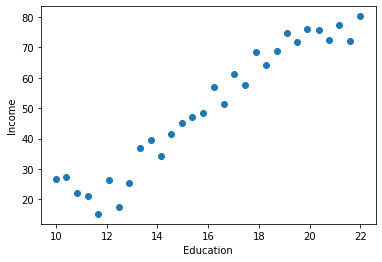

In [5]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.savefig('./img/income.jpg', dpi=400)

In [24]:
X = torch.from_numpy(data.Education.to_numpy().reshape(-1, 1)).type(torch.FloatTensor)

Y = torch.from_numpy(data.Income.to_numpy().reshape(-1, 1)).type(torch.FloatTensor)

In [45]:
print(X.size(), Y.size())

torch.Size([30, 1]) torch.Size([30, 1])


In [6]:
from torch import nn

In [46]:
from torch import nn

class EIModel(nn.Module):
    def __init__(self):
        super(EIModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, inputs):
        logits = self.linear(inputs)
        return logits

In [47]:
model = EIModel()

In [48]:
loss_fn = nn.MSELoss()

In [49]:
X.shape

torch.Size([30, 1])

In [50]:
Y.shape

torch.Size([30, 1])

In [51]:
Y.size()

torch.Size([30, 1])

In [52]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001)

In [53]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y, y_pred)
        opt.zero_grad()
        loss.backward()
        opt.step()

In [61]:
print(list(model.named_parameters()))

[('linear.weight', Parameter containing:
tensor([[4.9718]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-28.3185], requires_grad=True))]


In [60]:
print(model.linear.weight)

Parameter containing:
tensor([[4.9718]], requires_grad=True)


In [56]:
model.linear.bias

Parameter containing:
tensor([-28.3185], requires_grad=True)

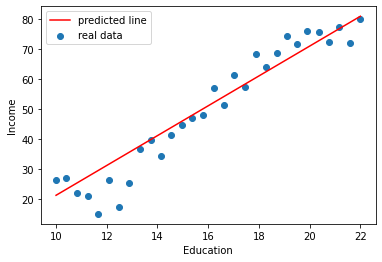

In [65]:
plt.scatter(data.Education, data.Income, label='real data')
plt.plot(X, model(X).detach().numpy(), c='r', label='predicted line')
plt.xlabel('Education')
plt.ylabel('Income')
plt.legend()
plt.show()
plt.savefig('img/1.2.jpg', dpi=400)

# 分解写法

In [58]:
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

模型的公式： w@x + b

In [59]:
learning_rate = 0.0001

In [21]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        loss = (y-y_pred).pow(2).sum()
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:    
            b.grad.data.zero_()
        loss.backward()
        with torch.no_grad():
            w.data -= w.grad.data*learning_rate
            b.data -= b.grad.data*learning_rate

In [22]:
w

tensor([4.9740], requires_grad=True)

In [23]:
b

tensor([-28.3584], requires_grad=True)

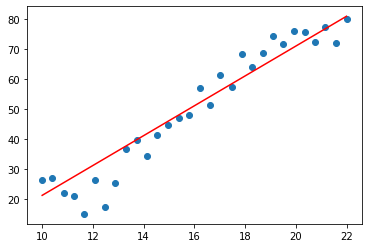

In [24]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), (torch.matmul(X, w) + b).data.numpy(), c='r')